# Unconstrained Optimization and Gradient Descent

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Backtracking line search procedure

In [ ]:
# backtracking procedure for the choice of the step size

def next_step(x, grad):
  alpha = 1.1 # starting setp size
  rho = 0.5 # multiplication factor
  c1 = 0.25 # constant
  p = -grad # descent direction
  j = 0 # iteration number
  jmax = 10 # max iterations

  # exit loop if step size verifies Armijo condition ot max iterations have been exceeded
  while ((f(x + alpha*p) > f(x) + c1*alpha*np.dot(grad, p)) and j<jmax):
    alpha = rho*alpha
    j+=1
  if (j > jmax):
    return -1 # optimal step size not found
  else:
    return alpha


## Gradient Descent procedure

In [ ]:
# implementation of Gradient Descent method

'''
Parameters:
  f: function to minimize
  grad_f: gradient of f
  x0: starting point
  step: fixed step size (usage depends on fixed value)
  maxit: max number of iterations allowed
  tol: tollerance to satisfy (norm of gradient needs to be lower than tol to terminate)
  xTrue: exact solution (used for logging)
  fixed: whether to use fixed step size or determine it with backtracking procedure
  hide_print: whether to print the found solution and the number of iterations performed
'''


def minimize(f, grad_f, x0, step, maxit, tol, xTrue, fixed=True, hide_print=False):
  x_list = np.zeros((2, maxit+1)) # solution calculated at each iteration
  norm_grad_list = np.zeros(maxit+1) # norm of gradient at each iteration
  function_eval_list = np.zeros(maxit+1) # value of the function at each iteration
  error_list = np.zeros(maxit+1) # error at each iteration

  x_last = x0 # solutions of precedeing iteration
  k = 0 # iteration number

  #initialize first values
  x_list[:,0] = x_last
  function_eval_list[k] = f(x0)
  error_list[k] = np.linalg.norm(xTrue - x0)
  norm_grad_list[k] = np.linalg.norm(grad_f(x0))

  # terminate if gradient's norm is lower than iteration or max number of iterations has been exceeded
  while (np.linalg.norm(grad_f(x_last)) > tol and k < maxit ):
    k=k+1
    grad = grad_f(x_last) #direction is given by gradient of the last iteration

    if fixed:
        step = step # fixed step
    else:
        step = next_step(x_last, grad) # backtracking step

    if(step == -1):
      print("f doesn't converge.")
      return (k) #no convergence

    # calculate new solution
    x_last = x_last - step*grad
    x_list[:,k] = x_last

    # update logging arrays
    function_eval_list[k] = f(x_last)
    error_list[k] = np.linalg.norm(xTrue - x_last)
    norm_grad_list[k] = np.linalg.norm(grad_f(x_last))

  # truncate logging arrays to last iteration
  function_eval_list = function_eval_list[:k+1]
  error_list = error_list[:k+1]
  norm_grad_list = norm_grad_list[:k+1]

  # print results
  if not hide_print:
    print('iterations = ',k)
    print('last guess: x = (%f,%f)'%(x_list[0,k],x_list[1,k]))

  return (x_last, norm_grad_list, function_eval_list, error_list, x_list, k)


## Auxiliary functions

In [ ]:
# to plot a function's surface given some points coordinates

def plot_surface(X, Y, Z):
  fig = plt.figure(figsize=(8, 5))
  ax = plt.axes(projection='3d')
  ax.set_title('f(x)')
  s = ax.plot_surface(X, Y, Z, cmap='viridis')
  fig.colorbar(s)
  plt.show()

In [ ]:
# to plot a function's controur and visualize some points on it

def plot_contour(X, Y, Z, xlist, xlistf):
  fig = plt.figure(figsize=(8, 5))
  contours = plt.contour(X, Y, Z, levels=1000)
  plt.title('Contour plot f(x)')
  fig.colorbar(contours)

  plt.plot(xlistf[0, :], xlistf[1, :], '*-', label='fixed')
  plt.plot(xlist[0, :], xlist[1, :], '*-', label='backtracking')

  plt.legend()
  plt.show()

In [ ]:
# to plot the logging arrays returned by the gradient descent function

def plot_results(norm_grad_listf, norm_grad_list, function_eval_listf, function_eval_list, error_listf, error_list):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

  ax1.semilogy(norm_grad_listf)
  ax1.semilogy(norm_grad_list)
  ax1.set_title('$\|\\nabla f(x_k)\|$')

  ax2.semilogy(function_eval_listf)
  ax2.semilogy(function_eval_list)
  ax2.set_title('$f(x_k)$')

  ax3.semilogy(error_listf)
  ax3.semilogy(error_list)
  ax3.set_title('$\|x_k-x^*\|$')

  fig.legend(['fixed', 'backtracking'], loc='lower center', ncol=4)
  plt.show()

## Application to $f(x) =$ $3(x-2)^2 +$ $(y - 1)^2$

In [ ]:
def f(vec):
    x, y = vec
    fout = 3*(x - 2)**2 + (y - 1)**2
    return fout

def grad_f(vec):
    x, y = vec
    dfdx = 6*(x- 2)
    dfdy = 2*(y - 1)
    return np.array([dfdx,dfdy])

In [ ]:
x = np.linspace(-1.5, 3.5, 100)
y = np.linspace(-1, 5, 100)

X, Y = np.meshgrid(x, y)
Z = f(np.array([X,Y]))

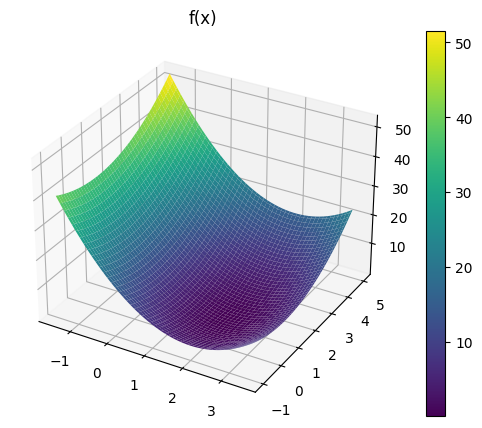

In [ ]:
plot_surface(X, Y, Z)

In [ ]:
step = 0.002
maxitS = 1000
tol = 1.e-5
x0 = np.array([3, 5])
xTrue = np.array([2, 1])

print('Fixed')
x_last, norm_grad_listf, function_eval_listf, error_listf, xlistf, kf = minimize(f, grad_f, x0, step, maxitS, tol, xTrue, fixed=True)

print('\nBacktracking')
x_last, norm_grad_list, function_eval_list, error_list, xlist, k = minimize(f, grad_f, x0, step, maxitS, tol, xTrue, fixed=False)

Fixed
iterations =  1000
last guess: x = (2.000006,1.072677)

Backtracking
iterations =  20
last guess: x = (2.000001,1.000003)


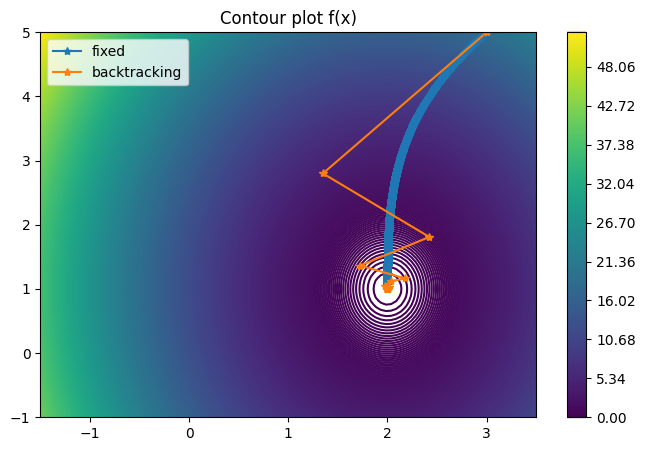

In [ ]:
plot_contour(X, Y, Z, xlist[:, :k], xlistf[:, :kf])

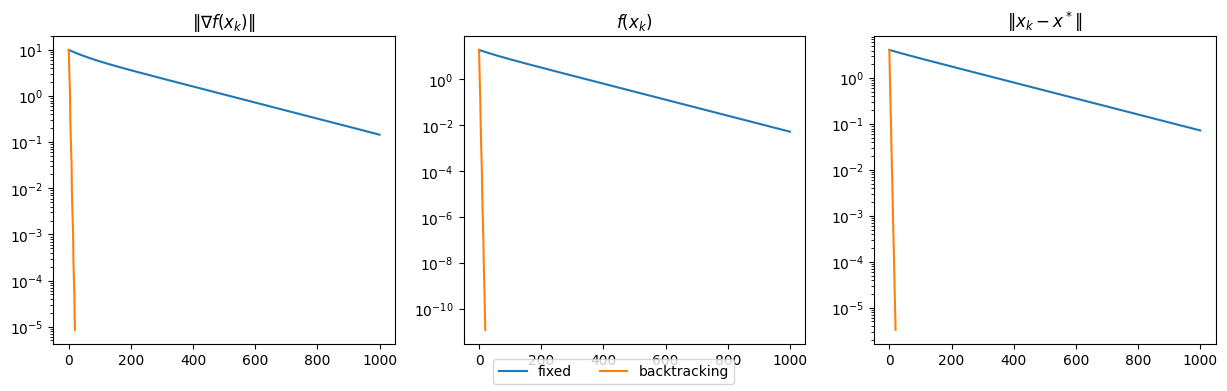

In [ ]:
plot_results(norm_grad_listf, norm_grad_list, function_eval_listf, function_eval_list, error_listf, error_list)

### Finding a better value for the fixed step size

In [ ]:
attempts = 20
step_range = np.linspace(0.001, 0.1, attempts)
errors, iters = np.zeros((attempts, 1)), np.zeros((attempts, 1))

for i in range(len(step_range)):
  step = step_range[i]
  (x_last,norm_grad_listf, function_eval_listf, error_listf, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=True, hide_print=True)
  errors[i] = error_listf[-1]
  iters[i] = k

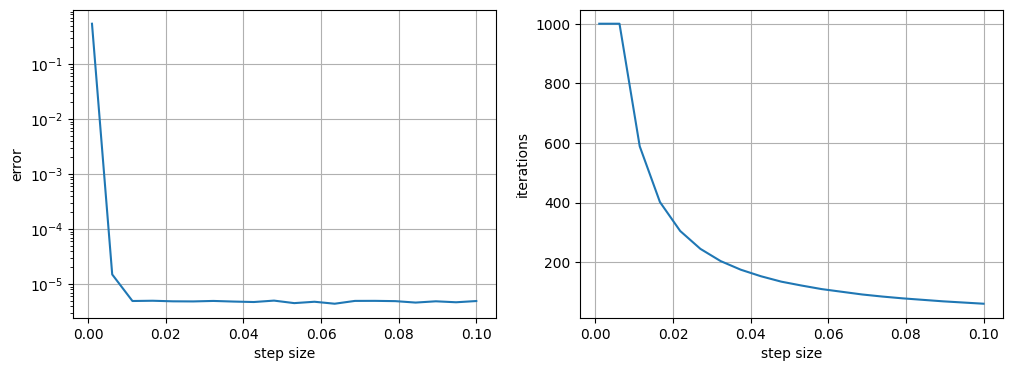

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(step_range, errors)
ax1.set_yscale('log')
ax1.set_xlabel('step size')
ax1.set_ylabel('error')
ax1.grid()

ax2.plot(step_range, iters)
ax2.set_xlabel('step size')
ax2.set_ylabel('iterations')
ax2.grid()

plt.show()

## Application to $f(x) =$ $100(y - $ $x^2)^2 +$ $(1 - x)^2$

This function is called Rosenbrock function and it's very difficult to minimize because the global minimum is inside a long, narrow, parabolic shaped flat valley.

In [ ]:
def f(vec):
    x, y = vec
    fout = 100*(y - x**2)**2 + (1 - x)**2
    return fout

def grad_f(vec):
    x, y = vec
    dfdx = -100*2*(y - x**2)*2*x - 2*(1-x)
    dfdy = 100*2*(y - x**2)
    return np.array([dfdx,dfdy])

In [ ]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)

X, Y = np.meshgrid(x, y)
Z = f(np.array([X,Y]))

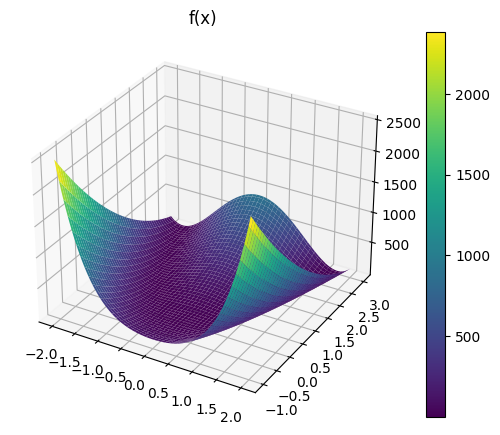

In [ ]:
plot_surface(X, Y, Z)

In [ ]:
step = 0.001
maxitS = 1000
tol = 1.e-5
x0 = np.array([-0.5, 1])
xTrue = np.array([1, 1])

print('Fixed')
x_last, norm_grad_listf, function_eval_listf, error_listf, xlistf, kf = minimize(f, grad_f, x0, step, maxitS, tol, xTrue, fixed=True)

print('\nBacktracking')
x_last, norm_grad_list, function_eval_list, error_list, xlist, k = minimize(f, grad_f, x0, step, maxitS, tol, xTrue, fixed=False)

Fixed
iterations =  1000
last guess: x = (0.482604,0.230313)

Backtracking
iterations =  1000
last guess: x = (0.992916,0.985849)


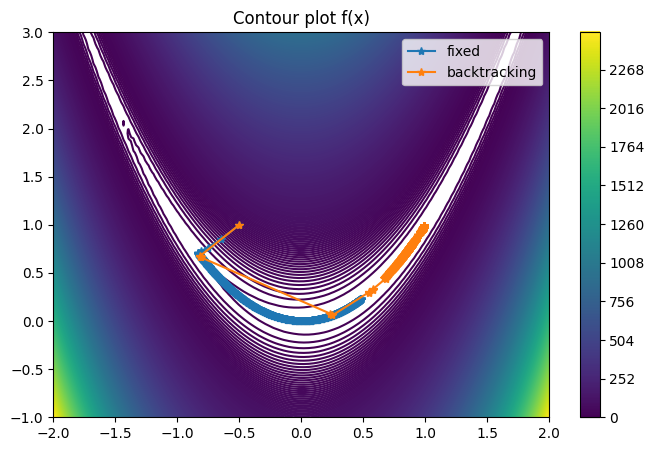

In [ ]:
plot_contour(X, Y, Z, xlist[:, :k], xlistf[:, :kf])

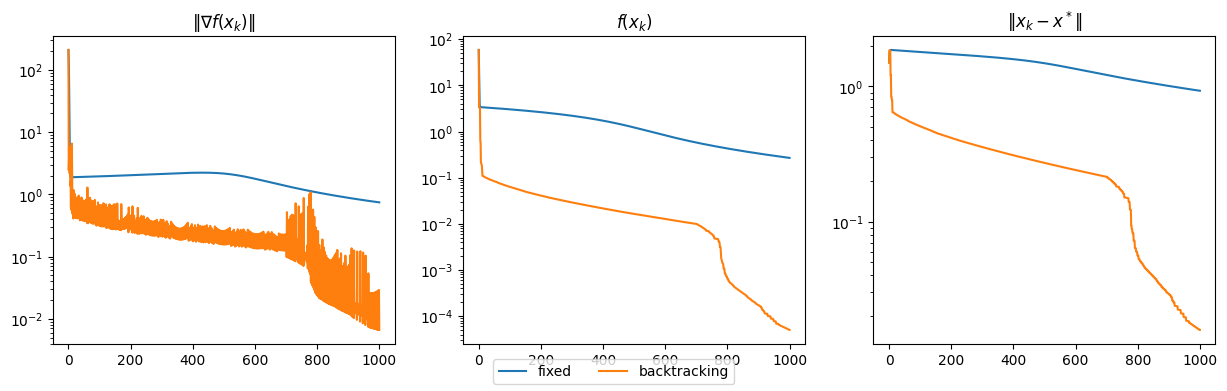

In [ ]:
plot_results(norm_grad_listf, norm_grad_list, function_eval_listf, function_eval_list, error_listf, error_list)

### Increasing the number of iterations - fixed step

In [ ]:
step = 0.001
tol=1.e-5
x0 = np.array([-0.5, 1])
xTrue = np.array([1, 1])

fsf, grad_normsf, errorsf = [], [], []
its = range(1000, 10000, 100)

for maxitS in its:
    (x_last,norm_grad_listf, function_eval_listf, error_listf, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=True, hide_print=True)
    fsf.append(function_eval_listf[-1])
    grad_normsf.append(norm_grad_listf[-1])
    errorsf.append(error_listf[-1])

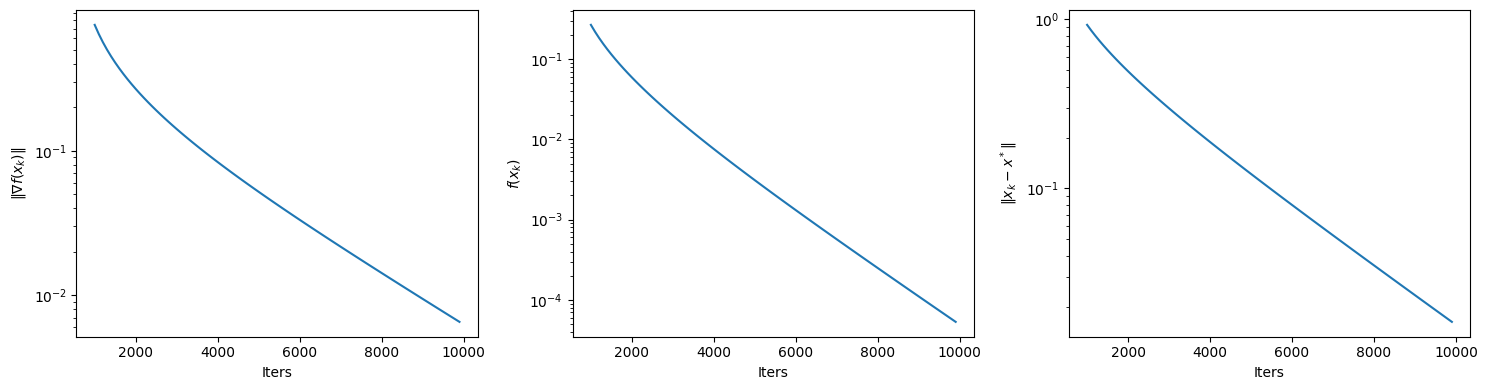

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.plot(its, grad_normsf)
ax1.set_yscale('log')
ax1.set_xlabel('Iters')
ax1.set_ylabel('$\|\\nabla f(x_k)\|$')

ax2.plot(its, fsf)
ax2.set_yscale('log')
ax2.set_xlabel('Iters')
ax2.set_ylabel('$f(x_k)$')

ax3.plot(its, errorsf)
ax3.set_yscale('log')
ax3.set_xlabel('Iters')
ax3.set_ylabel('$\|x_k-x^*\|$')

fig.tight_layout()
plt.show()

### Increasing the number of iterations - variable step

In [ ]:
step = 0.001
tol=1.e-5
x0 = np.array([-0.5, 1])
xTrue = np.array([1, 1])

fs, grad_norms, errors = [], [], []
its = range(1000, 2000, 100)

for maxitS in its:
    (x_last, norm_grad_list, function_eval_list, error_list, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=False, hide_print=True)
    fs.append(function_eval_list[-1])
    grad_norms.append(norm_grad_list[-1])
    errors.append(error_list[-1])

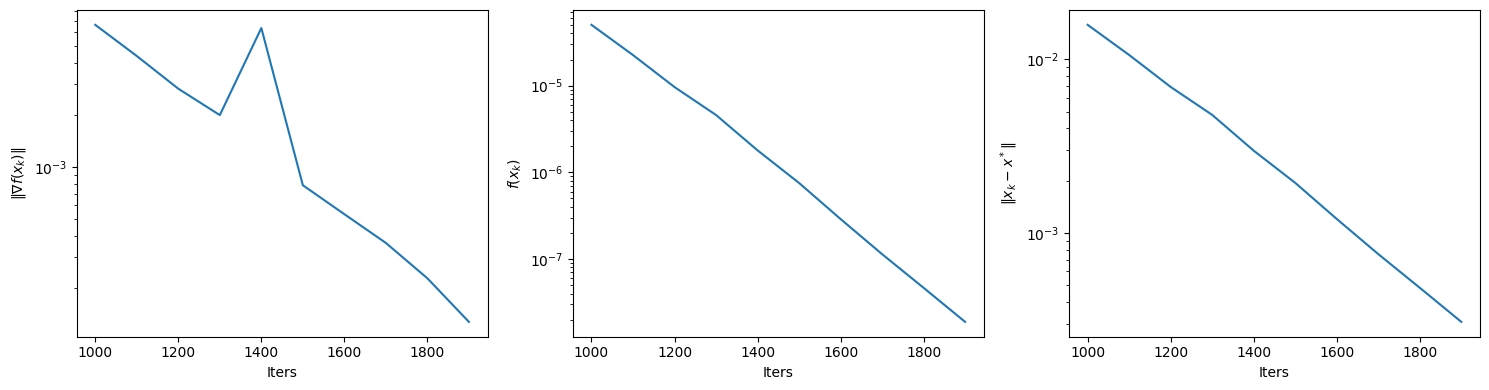

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.plot(its, grad_norms)
ax1.set_yscale('log')
ax1.set_xlabel('Iters')
ax1.set_ylabel('$\|\\nabla f(x_k)\|$')

ax2.plot(its, fs)
ax2.set_yscale('log')
ax2.set_xlabel('Iters')
ax2.set_ylabel('$f(x_k)$')

ax3.plot(its, errors)
ax3.set_yscale('log')
ax3.set_xlabel('Iters')
ax3.set_ylabel('$\|x_k-x^*\|$')

fig.tight_layout()
plt.show()